## Loading Packages

In [1]:

import os, shutil

import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
#matplotlib.get_backend()

from tensorflow.keras.applications import VGG16
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("No GPU installed - You are as slow as a High-End Windows PC")


No GPU installed - You are as slow as a High-End Windows PC


## Data Preparation

In [3]:
new_folders = False

# Odrner für die Originaldaten
original_dataset_dir = 'dataset/original_data'

# Ordner für die Trainings, Validierungs und Testdaten
base_dir = 'dataset/dataset'
#os.mkdir(base_dir)

#creates train-, validation- and test-folder
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# creates a cat and a dog folder in the train folder
train_y_dir = os.path.join(train_dir, 'y')
#os.mkdir(train_y_dir)
train_n_dir = os.path.join(train_dir, 'n')
#os.mkdir(train_n_dir)

# creates a cat and a dog folder in the validation folder
validation_y_dir = os.path.join(validation_dir, 'y')
#os.mkdir(validation_y_dir)
validation_n_dir = os.path.join(validation_dir, 'n')
#os.mkdir(validation_n_dir)

# creates a cat and a dog folder in the test folder
test_y_dir = os.path.join(test_dir, 'y')
#os.mkdir(test_y_dir)
test_n_dir = os.path.join(test_dir, 'n')
#os.mkdir(test_n_dir)

if new_folders == True:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_y_dir)
    os.mkdir(train_n_dir)
    os.mkdir(validation_y_dir)
    os.mkdir(validation_n_dir)
    os.mkdir(test_y_dir)
    os.mkdir(test_n_dir)

In [4]:
# read size of the dataset folders

print('total y images:', len(os.listdir('dataset/original_data/y')))
print('total n images:', len(os.listdir('dataset/original_data/n')))

total y images: 1667
total n images: 1943


In [5]:
# calculates the number of images for train, validation and test
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# calculates the number of images for train, validation and test
train_y_size = int(len(os.listdir('dataset/original_data/y')) * train_size)
train_n_size = int(len(os.listdir('dataset/original_data/n')) * train_size)

validation_y_size = int(len(os.listdir('dataset/original_data/y')) * validation_size)
validation_n_size = int(len(os.listdir('dataset/original_data/n')) * validation_size)

test_y_size = int(len(os.listdir('dataset/original_data/y')) * test_size)
test_n_size = int(len(os.listdir('dataset/original_data/n')) * test_size)

train_y_size

1000

In [6]:
renamed = True
y_dir = 'dataset/original_data/y/'
n_dir = 'dataset/original_data/n/'
if renamed == False:
    # change name of the images in the dataset folder
    # nur einmal Ausführen!



    i = 0
    for filename in os.listdir(y_dir):
        os.rename(y_dir + filename, y_dir + 'y.' + str(i) + '.jpg')
        i = i + 1

    y = 0
    for filename in os.listdir(n_dir):
        os.rename(n_dir + filename, n_dir + 'n.' + str(y) + '.jpg')
        y = y + 1
        

    # copy train_y_size images from the original dataset to the train_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(train_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy train_n_size images from the original dataset to the train_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(train_n_dir, fname)
        shutil.copyfile(src, dst)

    # copy validation_y_size images from the original dataset to the validation_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size, train_y_size + validation_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(validation_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy validation_n_size images from the original dataset to the validation_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size, train_n_size + validation_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(validation_n_dir, fname)
        shutil.copyfile(src, dst)

    # copy test_y_size images from the original dataset to the test_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size + validation_y_size, train_y_size + validation_y_size + test_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(test_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy test_n_size images from the original dataset to the test_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size + validation_n_size, train_n_size + validation_n_size + test_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(test_n_dir, fname)
        shutil.copyfile(src, dst)
    

## Control of the data

In [7]:
print('total training y images:', len(os.listdir(train_y_dir)))
print('total training n images:', len(os.listdir(train_n_dir)))
print('total validation y images:', len(os.listdir(validation_y_dir)))
print('total validation n images:', len(os.listdir(validation_n_dir)))
print('total test y images:', len(os.listdir(test_y_dir)))
print('total test n images:', len(os.listdir(test_n_dir)))

total training y images: 1000
total training n images: 1165
total validation y images: 333
total validation n images: 388
total test y images: 333
total test n images: 388


## Data Gathering with Generator


In [8]:
# without Data Augmentation

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'binary'
)

Found 2165 images belonging to 2 classes.
Found 721 images belonging to 2 classes.


Look at the output of one of these generators.

In [9]:

for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break


data_batch shape: (16, 150, 150, 3)
labels batch shape (16,)


## Modeling
Nun sollen Sie ein Modell für diese Daten bauen.

In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='acc', patience=10, verbose=1, mode='auto', restore_best_weights=True)

In [11]:
#create a base_line model

base_model = keras.models.Sequential()

base_model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
base_model.add(keras.layers.Dropout(0.3))
base_model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
base_model.add(keras.layers.Dropout(0.3))
base_model.add(keras.layers.MaxPooling2D((2,2)))



base_model.add(tf.keras.layers.Flatten())
base_model.add(keras.layers.Dense(256, activation='relu'))

base_model.add(keras.layers.Dense(1, activation='sigmoid'))
base_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 146, 146, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                        

In [12]:




# Compile the model with balanced class weights
base_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

# Train the model with balanced class weights
history = base_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32
)


Epoch 1/30
32/32 [==============================] - 58s 2s/step - loss: 8.6980 - acc: 0.5605 - val_loss: 0.6664 - val_acc: 0.5078
Epoch 2/30
32/32 [==============================] - 56s 2s/step - loss: 0.6631 - acc: 0.6707 - val_loss: 0.6647 - val_acc: 0.4922
Epoch 3/30
32/32 [==============================] - 56s 2s/step - loss: 0.7227 - acc: 0.6707 - val_loss: 0.6700 - val_acc: 0.4551
Epoch 4/30
32/32 [==============================] - 56s 2s/step - loss: 0.5817 - acc: 0.6966 - val_loss: 0.6648 - val_acc: 0.4668
Epoch 5/30
32/32 [==============================] - 56s 2s/step - loss: 0.5478 - acc: 0.7422 - val_loss: 0.6406 - val_acc: 0.5449
Epoch 6/30
32/32 [==============================] - 57s 2s/step - loss: 0.4527 - acc: 0.7910 - val_loss: 0.5680 - val_acc: 0.6660
Epoch 7/30
32/32 [==============================] - 57s 2s/step - loss: 0.4631 - acc: 0.8242 - val_loss: 0.5816 - val_acc: 0.7266
Epoch 8/30
32/32 [==============================] - 56s 2s/step - loss: 0.4361 - acc: 0.83

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']



fig = go.Figure()

# Assuming you have defined the variables 'acc' and 'val_acc'
#title
fig.update_layout(
    title="Base Model",
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)


fig.add_trace(go.Scatter(x=np.arange(1, len(acc)+1), y=acc,
                    mode='lines',
                    name='accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(val_acc)+1), y=val_acc,
                    mode='lines',
                    name='validation accuracy'))

# Save the plot as an HTML file
pio.write_html(fig, 'base_model.html')


Found 721 images belonging to 2 classes.
46/46 [==============================] - 30s 664ms/step - loss: 0.3663 - acc: 0.8877
test acc: 0.887656033039093
46/46 [==============================] - 27s 587ms/step
46/46 - 28s - loss: 0.3663 - acc: 0.8877 - 28s/epoch - 606ms/step

Test accuracy: 0.36631548404693604

Test loss: 0.887656033039093
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       388
           1       0.45      0.49      0.47       333

    accuracy                           0.49       721
   macro avg       0.49      0.49      0.49       721
weighted avg       0.49      0.49      0.49       721



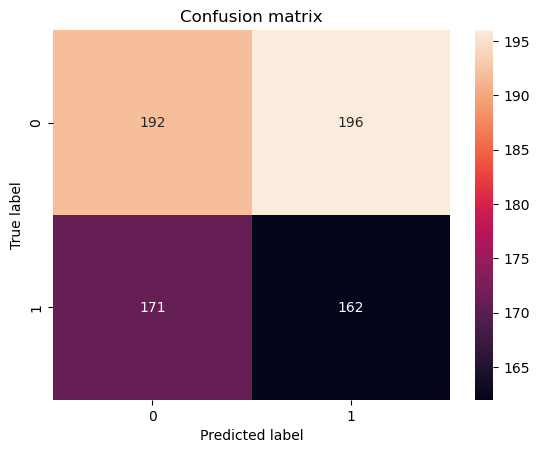

In [14]:
#plot confusion matrix for test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'binary'

)

test_loss, test_acc = base_model.evaluate(test_generator)
print('test acc:', test_acc)
y_pred = base_model.predict(test_generator)

y_pred = np.round(y_pred)

cm = confusion_matrix(test_generator.classes, y_pred)
cm

test_acc, test_loss = base_model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#save confusion matrix
plt.savefig('base_model_confusion_matrix.png')


#print classification report

from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, y_pred))


# Pretrainned Model

In [15]:


# Load pre-trained VGG16 model without the top layers (include_top=False)
pr_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
pr_model.trainable = False

# Create a new model by adding your own classifier on top of the pre-trained base
model = keras.models.Sequential()
model.add(pr_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=1e-3), metrics=['acc'])

# Train the model
history1 = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32, callbacks=[early_stopping]
)




c:\Users\benit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/30
32/32 [==============================] - 76s 2s/step - loss: 0.4590 - acc: 0.7734 - val_loss: 0.4302 - val_acc: 0.8105
Epoch 2/30
32/32 [==============================] - 74s 2s/step - loss: 0.3485 - acc: 0.8691 - val_loss: 0.5823 - val_acc: 0.7441
Epoch 3/30
32/32 [==============================] - 74s 2s/step - loss: 0.3354 - acc: 0.8555 - val_loss: 0.7003 - val_acc: 0.6738
Epoch 4/30
32/32 [==============================] - 74s 2s/step - loss: 0.3495 - acc: 0.8574 - val_loss: 0.6258 - val_acc: 0.7070
Epoch 5/30
19/32 [================>.............] - ETA: 15s - loss: 0.3560 - acc: 0.8328

KeyboardInterrupt: 

In [ ]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

fig = go.Figure()

# Assuming you have defined the variables 'acc' and 'val_acc'

#title
fig.update_layout(
    title="Pretrained Model",
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)


fig.add_trace(go.Scatter(x=np.arange(1, len(acc)+1), y=acc,
                    mode='lines',
                    name='accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(val_acc)+1), y=val_acc,
                    mode='lines',
                    name='validation accuracy'))

# Save the plot as an HTML file
pio.write_html(fig, 'pretrained_model.html')



test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
y_pred = model.predict(test_generator)

y_pred = np.round(y_pred)

cm = confusion_matrix(test_generator.classes, y_pred)
cm



sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#save confusion matrix
plt.savefig('base_model_confusion_matrix.png')


In [ ]:
model = tf.keras.models.Sequential()

# 1st convolutional layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 2nd convolutional layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 3rd convolutional layer
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# FFNN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 64)      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_generator, epochs=15, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/15
50/50 [==============================] - 35s 661ms/step - loss: 0.9089 - accuracy: 0.7200 - val_loss: 0.8924 - val_accuracy: 0.5785
Epoch 2/15
50/50 [==============================] - 28s 569ms/step - loss: 0.6218 - accuracy: 0.7760 - val_loss: 1.6174 - val_accuracy: 0.5785
Epoch 3/15
50/50 [==============================] - 28s 570ms/step - loss: 0.5760 - accuracy: 0.8000 - val_loss: 2.2947 - val_accuracy: 0.5785
Epoch 4/15
50/50 [==============================] - 29s 574ms/step - loss: 0.4482 - accuracy: 0.8360 - val_loss: 3.3709 - val_accuracy: 0.5785
Epoch 5/15
49/50 [============================>.] - ETA: 0s - loss: 0.4064 - accuracy: 0.8449

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']



fig = go.Figure()

# Assuming you have defined the variables 'acc' and 'val_acc'

#title
fig.update_layout(
    title="CNN Model",
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.add_trace(go.Scatter(x=np.arange(1, len(acc)+1), y=acc,
                    mode='lines',
                    name='accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(val_acc)+1), y=val_acc,
                    mode='lines',
                    name='validation accuracy'))

# Save the plot as an HTML file
pio.write_html(fig, 'C_D_model.html')


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
y_pred = model.predict(test_generator)

y_pred = np.round(y_pred)

cm = confusion_matrix(test_generator.classes, y_pred)
cm



sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#save confusion matrix
plt.savefig('base_model_confusion_matrix.png')


KeyError: 'accuracy'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# test the model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)


Found 358 images belonging to 2 classes.
18/18 [==============================] - 11s 615ms/step - loss: 1.1475 - accuracy: 0.7207
test acc: 0.7206704020500183
